In [1]:
import os
os.chdir("C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle-Practice\\Solar\\Solar-Date-Prediction")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Import the Data Required
data = pd.read_csv("C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle-Practice\\Solar\\Solar-Date-Prediction\\datasets_49078_832847_PV_Elec_Gas2.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 4 columns):
Unnamed: 0    2948 non-null object
cum_power     2948 non-null float64
Elec_kW       2948 non-null float64
Gas_mxm       2948 non-null float64
dtypes: float64(3), object(1)
memory usage: 92.2+ KB


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.columns

Index(['Unnamed: 0', 'cum_power', 'Elec_kW', 'Gas_mxm'], dtype='object')

In [7]:
data.isnull().sum()

Unnamed: 0    0
cum_power     0
Elec_kW       0
Gas_mxm       0
dtype: int64

In [8]:
data.head()

,Unnamed: 0,cum_power,Elec_kW,Gas_mxm
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3


In [9]:
data.shape

(2948, 4)

In [10]:
nrow, ncol = data.shape
print(f"There are {nrow} rows and {ncol} columns in this dataset")

There are 2948 rows and 4 columns in this dataset


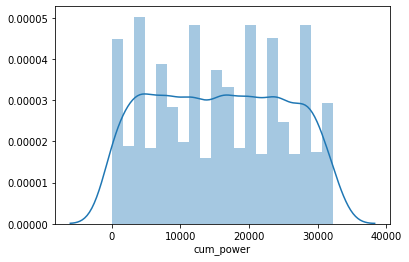

In [11]:
sns.distplot(data['cum_power'], bins=20, kde=True)

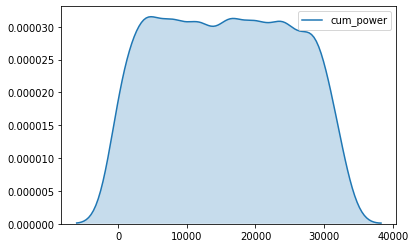

In [12]:
sns.kdeplot(data['cum_power'], shade=True)

In [13]:
total_cells = np.product(data.shape)
print("Total Cells available in this dataset are: ", total_cells)

Total Cells available in this dataset are:  11792


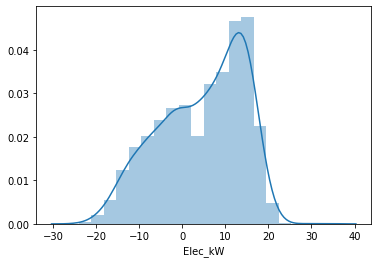

In [14]:
sns.distplot(data['Elec_kW'], bins=20, kde=True)

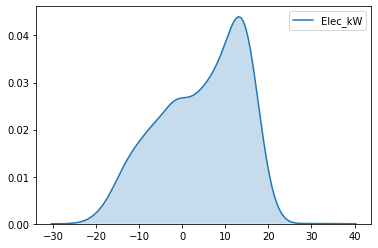

In [15]:
sns.kdeplot(data['Elec_kW'],shade=True)

In [16]:
data.columns

Index(['Unnamed: 0', 'cum_power', 'Elec_kW', 'Gas_mxm'], dtype='object')

In [17]:
data.rename(columns={"Unnamed: 0":"Date"},inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 4 columns):
Date         2948 non-null object
cum_power    2948 non-null float64
Elec_kW      2948 non-null float64
Gas_mxm      2948 non-null float64
dtypes: float64(3), object(1)
memory usage: 92.2+ KB


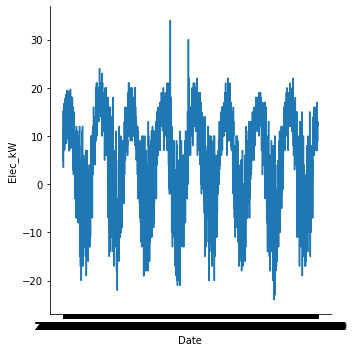

In [19]:
sns.relplot(x='Date',y='Elec_kW',data=data, kind='line')

In [20]:
missing_data = data.isnull().sum()
print("The Column wise missing Data are :\n", missing_data)

The Column wise missing Data are :
 Date         0
cum_power    0
Elec_kW      0
Gas_mxm      0
dtype: int64


In [21]:
total_missing = missing_data.sum()
print("The total number of missing values in the dataset are : ",total_missing)

The total number of missing values in the dataset are :  0


In [22]:
total_cells = np.product(data.shape)
print("Total number of Cells available in the dataset are : ",total_cells)

Total number of Cells available in the dataset are :  11792


In [23]:
percent_missing_cells = (total_missing/total_cells)*100
print("The total percentage of missing data in the original dataset is : ",percent_missing_cells,"% .")

The total percentage of missing data in the original dataset is :  0.0 % .


<Figure size 1800x1440 with 0 Axes>

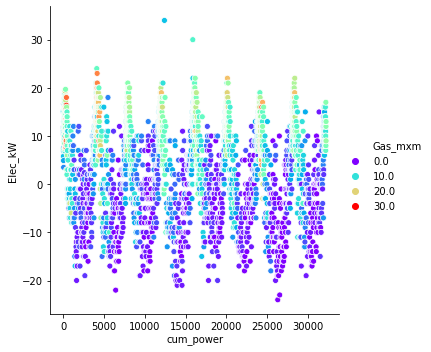

<Figure size 1800x1440 with 0 Axes>

In [24]:
sns.relplot(x='cum_power',y='Elec_kW',kind='scatter', hue='Gas_mxm',palette='rainbow',data=data)
plt.figure(figsize=(25,20))

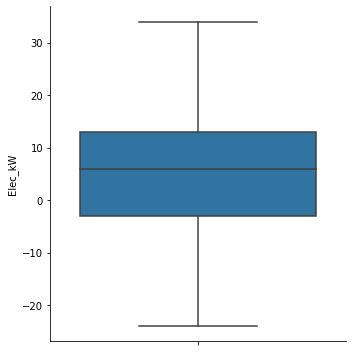

In [25]:
sns.catplot(y='Elec_kW',kind='box',data=data)

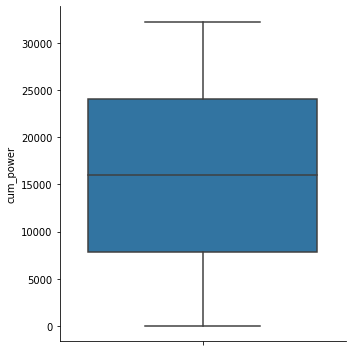

In [26]:
sns.catplot(y='cum_power',kind='box',data=data)

In [27]:
data['Date'] = pd.to_datetime(data['Date'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 4 columns):
Date         2948 non-null datetime64[ns]
cum_power    2948 non-null float64
Elec_kW      2948 non-null float64
Gas_mxm      2948 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 92.2 KB


In [29]:
data.set_index('Date',inplace=True)

In [30]:
data.head()

,cum_power,Elec_kW,Gas_mxm
Date,,,
2011-10-26,0.1,15.1,9.0
2011-10-27,10.2,7.4,9.2
2011-10-28,20.2,5.8,8.0
2011-10-29,29.6,4.9,6.6
2011-10-30,34.2,11.7,5.3


In [31]:
data.tail()

,cum_power,Elec_kW,Gas_mxm
Date,,,
2019-11-16,32231.0,12.0,15.0
2019-11-17,32235.0,13.0,14.0
2019-11-18,32238.0,13.0,14.0
2019-11-19,32238.0,13.0,15.0
2019-11-20,32244.0,9.0,16.0


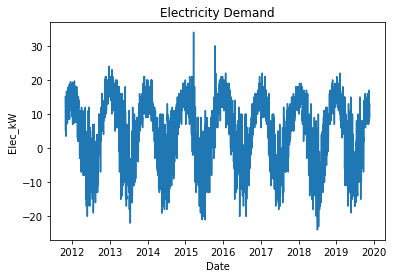

In [135]:
plt.xlabel("Date")
plt.ylabel("Elec_kW")
plt.title("Electricity Demand")
plt.plot(data['Elec_kW'])
plt.show()

In [34]:
data.describe()

,cum_power,Elec_kW,Gas_mxm
count,2948.000000,2948.000000,2948.000000
mean,15630.977510,4.520014,8.434735
std,9408.564934,9.838686,6.410362
min,0.100000,-24.000000,0.000000
25%,7842.500000,-3.000000,2.000000
50%,15996.500000,6.000000,8.000000
75%,23996.500000,13.000000,14.000000
max,32244.000000,34.000000,29.000000


In [35]:
data.index

DatetimeIndex(['2011-10-26', '2011-10-27', '2011-10-28', '2011-10-29',
               '2011-10-30', '2011-10-31', '2011-11-01', '2011-11-02',
               '2011-11-03', '2011-11-04',
               ...
               '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18',
               '2019-11-19', '2019-11-20'],
              dtype='datetime64[ns]', name='Date', length=2948, freq=None)

In [36]:
train=data['2011-10-26':'2017-10-25']
test = data['2017-10-26':]

In [37]:
train.shape

(2192, 3)

In [38]:
test.shape

(756, 3)

In [39]:
data['2019']

,cum_power,Elec_kW,Gas_mxm
Date,,,
2019-01-01,28323.0,19.0,12.0
2019-01-02,28324.0,16.0,13.0
2019-01-03,28325.0,16.0,15.0
2019-01-04,28328.0,14.0,13.0
2019-01-05,28329.0,21.0,17.0
...,...,...,...
2019-11-16,32231.0,12.0,15.0
2019-11-17,32235.0,13.0,14.0
2019-11-18,32238.0,13.0,14.0


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2011-10-26 to 2017-10-25
Data columns (total 3 columns):
cum_power    2192 non-null float64
Elec_kW      2192 non-null float64
Gas_mxm      2192 non-null float64
dtypes: float64(3)
memory usage: 68.5 KB


In [41]:
train_1 = train.drop(['cum_power','Gas_mxm'],axis=1)

In [42]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2011-10-26 to 2017-10-25
Data columns (total 1 columns):
Elec_kW    2192 non-null float64
dtypes: float64(1)
memory usage: 34.2 KB


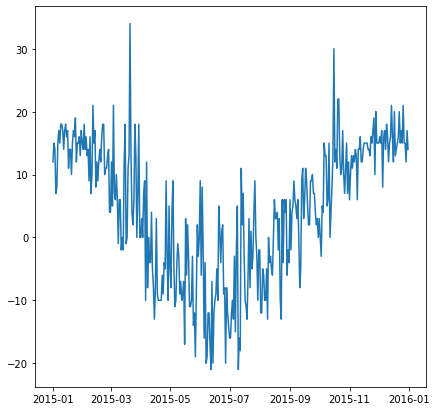

In [43]:
plt.figure(figsize=(7,7))
plt.plot(train_1['2015'])

In [45]:
from statsmodels.tsa.stattools import adfuller

In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolling = timeseries.rolling(window=12)
    rolmean = rolling.mean()
    rolstd = rolling.std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

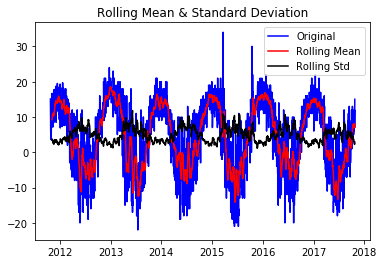

In [49]:
test_stationarity(train_1)

In [65]:
x= train_1.values

In [66]:
x

array([[15.1],
       [ 7.4],
       [ 5.8],
       ...,
       [12. ],
       [ 7. ],
       [15. ]])

In [71]:
ts = data[pd.Series(pd.to_datetime(data.index, errors='coerce')).notnull().values]

In [72]:
ts.head(5)

,cum_power,Elec_kW,Gas_mxm
Date,,,
2011-10-26,0.1,15.1,9.0
2011-10-27,10.2,7.4,9.2
2011-10-28,20.2,5.8,8.0
2011-10-29,29.6,4.9,6.6
2011-10-30,34.2,11.7,5.3


In [74]:
ts.dtypes

cum_power    float64
Elec_kW      float64
Gas_mxm      float64
dtype: object

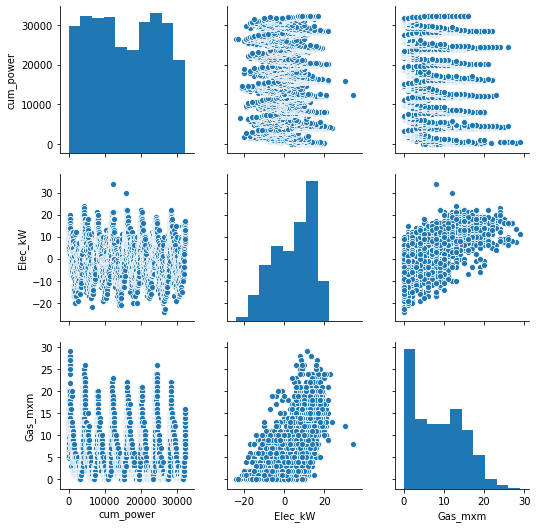

In [75]:
sns.pairplot(ts)

In [76]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2948 entries, 2011-10-26 to 2019-11-20
Data columns (total 3 columns):
cum_power    2948 non-null float64
Elec_kW      2948 non-null float64
Gas_mxm      2948 non-null float64
dtypes: float64(3)
memory usage: 172.1 KB


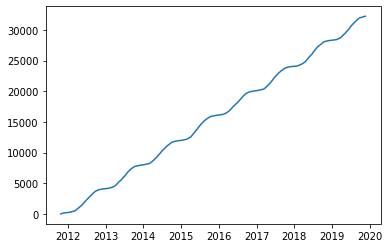

In [80]:
plt.plot(data['cum_power'])

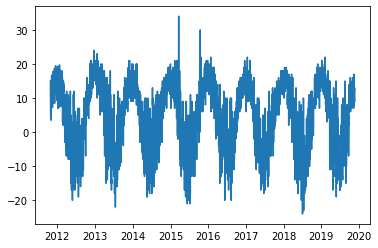

In [81]:
plt.plot(data['Elec_kW'])

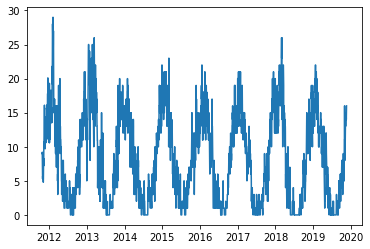

In [82]:
plt.plot(data['Gas_mxm'])

In [ ]:
#Testing the Stationarity

In [87]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 5)
    plt.yticks(fontsize = 5)
    
    plt.xlabel('Time in Years', fontsize = 5)
    plt.ylabel('Total Power', fontsize = 5)
    plt.legend(loc='best', fontsize = 5)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 5)
    plt.show(block= True)

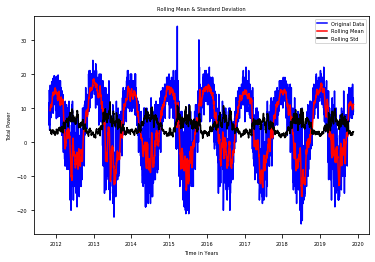

In [88]:
TestStationaryPlot(data['Elec_kW'])

In [91]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [92]:
TestStationaryAdfuller(data['Elec_kW'])

Test Statistic                   -3.257358
p-value                           0.016896
#Lags Used                       19.000000
Number of Observations Used    2928.000000
Critical Value (1%)              -3.432585
Critical Value (5%)              -2.862528
Critical Value (10%)             -2.567296
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [93]:
#Transformation of the Dataset to Stationary
#Moving Average

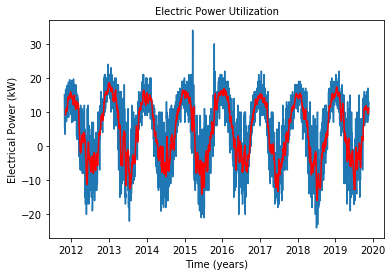

In [94]:
moving_avg = data['Elec_kW'].rolling(12).mean()
plt.plot(data['Elec_kW'])
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time (years)', fontsize = 10)
plt.ylabel('Electrical Power (kW)', fontsize = 10)
plt.title('Electric Power Utilization', fontsize = 10)
plt.show()

In [96]:
mte_moving_avg_diff = data['Elec_kW'] - moving_avg
mte_moving_avg_diff.head(100)

Date
2011-10-26         NaN
2011-10-27         NaN
2011-10-28         NaN
2011-10-29         NaN
2011-10-30         NaN
                ...   
2012-01-29    4.033333
2012-01-30    2.491667
2012-01-31    1.066667
2012-02-01   -5.250000
2012-02-02   -5.708333
Name: Elec_kW, Length: 100, dtype: float64

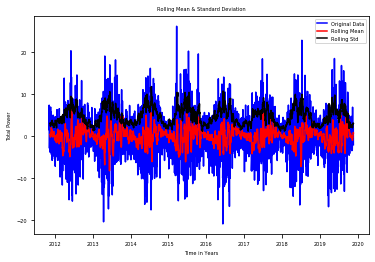

In [97]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [98]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                -1.357662e+01
p-value                        2.163437e-25
#Lags Used                     1.900000e+01
Number of Observations Used    2.917000e+03
Critical Value (1%)           -3.432594e+00
Critical Value (5%)           -2.862531e+00
Critical Value (10%)          -2.567298e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


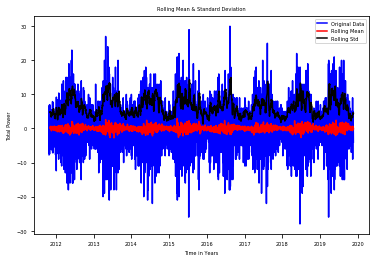

In [115]:
mte_first_difference = data['Elec_kW'] - data['Elec_kW'].shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [116]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                -1.801362e+01
p-value                        2.709505e-30
#Lags Used                     1.800000e+01
Number of Observations Used    2.928000e+03
Critical Value (1%)           -3.432585e+00
Critical Value (5%)           -2.862528e+00
Critical Value (10%)          -2.567296e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


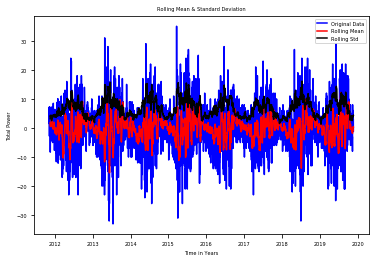

Test Statistic                -8.950719e+00
p-value                        8.738976e-15
#Lags Used                     2.800000e+01
Number of Observations Used    2.907000e+03
Critical Value (1%)           -3.432601e+00
Critical Value (5%)           -2.862535e+00
Critical Value (10%)          -2.567300e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [117]:
mte_seasonal_difference = data['Elec_kW'] - data['Elec_kW'].shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

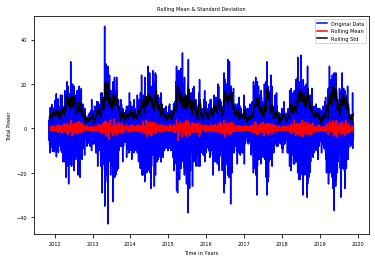

In [118]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [119]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                  -19.428422
p-value                           0.000000
#Lags Used                       28.000000
Number of Observations Used    2906.000000
Critical Value (1%)              -3.432602
Critical Value (5%)              -2.862535
Critical Value (10%)             -2.567300
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [120]:
#Eliminating Trend and Seasonality

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Elec_kW'])

In [122]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

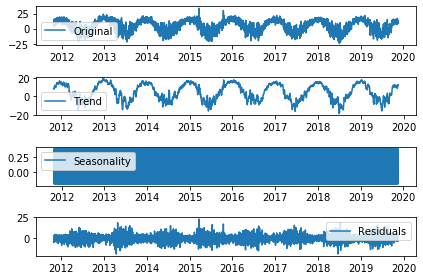

In [123]:
plt.subplot(411)
plt.plot(data['Elec_kW'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

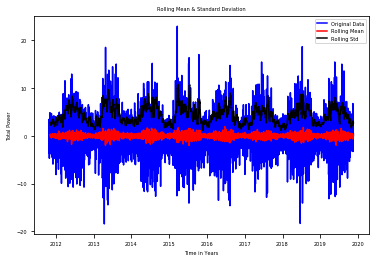

Test Statistic                  -19.539976
p-value                           0.000000
#Lags Used                       28.000000
Number of Observations Used    2913.000000
Critical Value (1%)              -3.432597
Critical Value (5%)              -2.862533
Critical Value (10%)             -2.567298
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [124]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

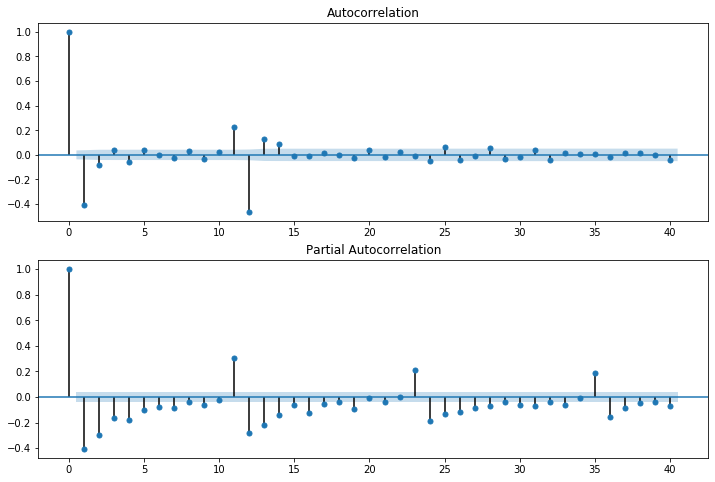

In [125]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [127]:
import itertools
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [128]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [129]:
mod = sm.tsa.statespace.SARIMAX(data['Elec_kW'], 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            Elec_kW   No. Observations:                 2948
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -9165.892
Date:                            Fri, 05 Jun 2020   AIC                          18339.784
Time:                                    23:57:18   BIC                          18363.702
Sample:                                10-26-2011   HQIC                         18348.399
                                     - 11-20-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1768      0.020      8.838      0.000       0.138       0.216
ma.L1         -0.8522      0.011   

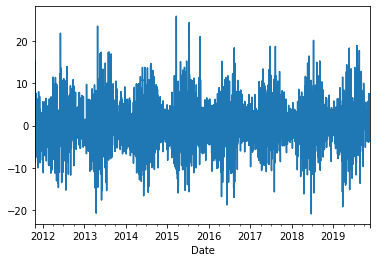

In [130]:
results.resid.plot()

In [131]:
print(results.resid.describe())

count    2948.000000
mean        0.003302
std         5.572527
min       -20.906301
25%        -3.519996
50%        -0.007936
75%         3.253876
max        25.897733
dtype: float64


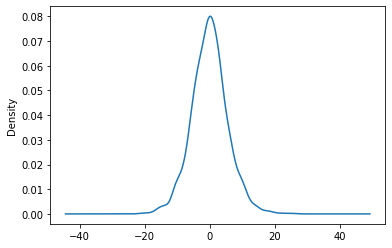

In [132]:
results.resid.plot(kind='kde')

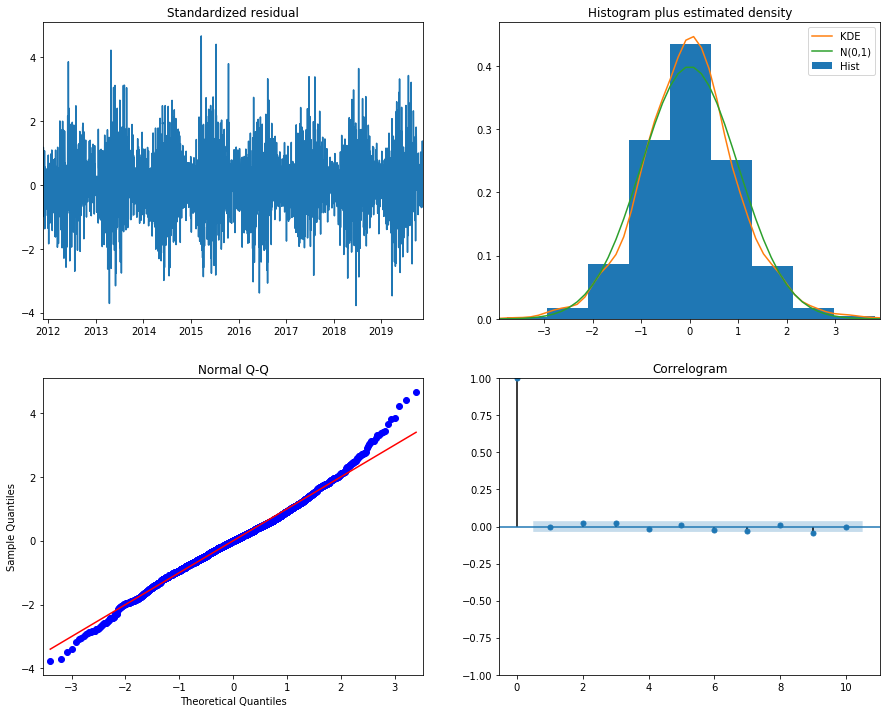

In [133]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [134]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Elec_kW,upper Elec_kW
2013-02-17,2.010034,23.939894
2013-02-18,6.931145,28.856670
2013-02-19,4.834163,26.758975
2013-02-20,-0.891535,21.032760
2013-02-21,2.613390,24.537310


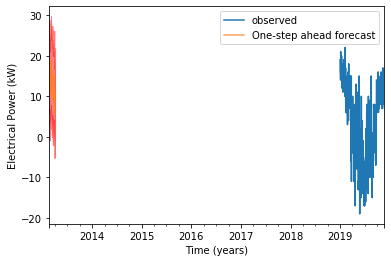

In [147]:
ax = data['Elec_kW']['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Electrical Power (kW)')
plt.legend()

plt.show()

In [148]:
mte_forecast = pred.predicted_mean
mte_truth = data['Elec_kW']['2019-11-20':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is nan
The Root Mean Square Error (RMSE) of the forcast: nan


In [149]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

In [154]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-11-20'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [156]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head(50)

,lower Elec_kW,upper Elec_kW
2019-11-21,-0.202853,21.495222
2019-11-22,-0.945555,21.867027
2019-11-23,-1.000170,22.242750
2019-11-24,-0.494252,23.089277
2019-11-25,-0.898016,23.007878
2019-11-26,-0.819573,23.402010
2019-11-27,-0.710945,23.821944
2019-11-28,-1.037457,23.802758
2019-11-29,-0.992767,24.151005
2019-11-30,-1.134581,24.309123
